# 1.1

In [1]:
import random
from sympy.combinatorics.graycode import GrayCode
from sympy.combinatorics.graycode import gray_to_bin
from deap import creator, base, tools, algorithms
import numpy as np
import matplotlib.patches as mpatches
#Importing required modules
import math
import random
import matplotlib.pyplot as plt
# Sample code for local neighbourhood PSO, using DEAP library
import operator
import random
import numpy
import math
from math import sqrt
from deap import base
from deap import benchmarks
from deap import creator
from deap import tools
# Sample code for social learning PSO, using DEAP library
import operator
import random
import numpy
import math
from deap import base
from deap import benchmarks
from deap import creator
from deap import tools
from pylab import *

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d.axes3d import Axes3D

import pandas as pd
import array
import random
import json

import numpy

from math import sqrt

from deap import algorithms
from deap import base
from deap import benchmarks
from deap.benchmarks.tools import diversity, convergence, hypervolume
from deap import creator
from sympy.combinatorics.graycode import gray_to_bin
from deap import tools

# a

In [2]:
popSize     = 50 #Population size
dimension   = 2 #Number of decision variable x 
numOfBits   = 30 #Number of bits in the chromosomes
iterations  = 100 #Number of generations to be run
dspInterval = 10
nElitists   = 1 #number of elite individuals selected
omega       = 5
crossPoints = 2 #variable not used. instead tools.cxTwoPoint
crossProb   = 0.6
flipProb    = 1. / (dimension * numOfBits) #bit mutate prob
mutateprob  = .1 #mutation prob
maxnum      = 2**numOfBits #absolute max size of number coded by binary list 1,0,0,1,1,....

creator.create("FitnessMax", base.Fitness, weights=(1.0,)) #only supports maximization(-1 for minimization)
creator.create("Individual", list, fitness=creator.FitnessMax)

# the goal ('fitness') function to be maximized
# fitness function: sphere model
#
# f(x1,x2) = 2 + (4.1*x1**2)-(2.1*x1**4)+(1/3*x1**6)+(x1*x2)-4(x2-0.05)**2+(4*x2**4)
def eval_sphere(individual):#this is our fitness function
    # the individual has x1 and x2 inside of it(20 bits).
#     print("individual: ",individual)
    sep=separatevariables(individual)#separate x1 and x2
#     print("x1: ",sep[0])
#     print("x2: ",sep[1])
    f= 2+4.1*(sep[0]**2)-2.1*(sep[0]**4)+1/3*(sep[0]**6)+sep[0]*sep[1]-4*(sep[1]-0.05)**2+4*sep[1]**4
#     print("fitness: ",f)
    return 1.0/(0.01+f), # DEAP doesn't allow minimisation for roulette selection
                         # so we convert to maximisation

toolbox = base.Toolbox()

# Attribute generator 
#                      define 'attr_bool' to be an attribute ('gene')
#                      which corresponds to integers sampled uniformly
#                      from the range [0,1] (i.e. 0 or 1 with equal
#                      probability)
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
#                         define 'individual' to be an individual
#                         consisting of numOfBits*dimension 'attr_bool' elements ('genes')
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_bool, numOfBits*dimension)#initializing the individual size

# define the population to be a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# register the goal / fitness function
toolbox.register("evaluate", eval_sphere)

# register the crossover operator
toolbox.register("mate", tools.cxTwoPoint) #two point crossover

# register a mutation operator with a probability to
# flip each attribute/gene of 0.05
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb)

# operator for selecting individuals for breeding the next
# generation: This uses fitness proportionate selection,
# also known as roulette wheel selection
toolbox.register("select", tools.selRoulette, fit_attr='fitness')

# Convert chromosome to real number
# input: list binary 1,0 of length numOfBits representing number using gray coding
# output: real value
def chrom2real(c):#what weve been doing in class on paper
    indasstring=''.join(map(str, c))
#     print("individual as string: ",indasstring)
    degray=gray_to_bin(indasstring)
    numasint=int(degray, 2) # convert to int from base 2 list
#     print("number as int: ",numasint)
    numinrange=-5+10*numasint/maxnum
    return numinrange

# input: concatenated list of binary variables
# output: tuple of real numbers representing those variables
def separatevariables(v):
    return chrom2real(v[0:numOfBits]),chrom2real(v[numOfBits:])

def main():
    import random
    #random.seed(64)
    maxlist=[]
    x1vals = []
    x2vals = []
    zvals = []
    combined = []

    pop = toolbox.population(n=popSize)

    for individ in pop:
        

        sep=separatevariables(individ)

    
        

    # Evaluate the fitness of the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
#     print("fitnesses: ",fitnesses)
    for ind, fit in zip(pop, fitnesses):#pair up the fitnesses to the individual
#         print("---: ",ind, fit)
        ind.fitness.values = fit # assign the fitness to the individual
    
    print("  Evaluated %i individuals" % len(pop))

    # Extracting all the fitnesses of 
    fits = [ind.fitness.values[0] for ind in pop]
#     print("fits",fits)

    # Variable keeping track of the number of generations
    g = 0
    
    
    # Begin the evolution
    while g < iterations:
#         print("BEST GUY: ",tools.selBest(pop, 1)[0])
        # A new generation
        g = g + 1
        print("-- Generation %i --" % g)

        
        # Select the next generation individuals
        #selBest selects the best individual while select uses roullete wheel
        offspring = tools.selBest(pop, nElitists) + toolbox.select(pop,len(pop)-nElitists)
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))


    
        # Apply crossover and mutation on the offspring
        # make pairs of offspring for crossing over
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
#             print("******************************")
            # cross two individuals with probability CXPB
            if random.random() < crossProb:
#                 print('before crossover ',child1, child2)
                toolbox.mate(child1, child2)

                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:

            # mutate an individual with probability mutateprob
            if random.random() < mutateprob:
                toolbox.mutate(mutant)
                del mutant.fitness.values
    
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        pop[:] = offspring

        fits = []
        i=0
        maximum = 0
        vals = []
        for ind in pop:
            i+=1
            x1,x2 =separatevariables(ind)
            x1vals.append(x1)
            x2vals.append(x2)
            zvals.append(ind.fitness.values[0])

            if ind.fitness.values[0] > maximum:
                maximum = ind.fitness.values[0]
                vals = [x1,x2,ind.fitness.values[0]]


            fits.append(ind.fitness.values[0])

        combined.append(vals)

        maxlist.append(1/max(fits))
        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5

        print("  Min %s" % min(fits))
        print("  Max %s" % max(fits))
        print("  Avg %s" % mean)
        print("  Std %s" % std)

    print("-- End of (successful) evolution --")

    
    
    best_ind = tools.selBest(pop, 1)[0]
    print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))
    print("Decoded x1, x2 is %s, %s" % (separatevariables(best_ind)))
#     plt.plot(maxlist)
    res = {
        "BestIndividual":best_ind,
        "fitness":best_ind.fitness.values,
        "x1":separatevariables(best_ind)[0],
        "x2":separatevariables(best_ind)[1],
        "maxlist":maxlist,
        "x1vals":x1vals,
        "x2vals":x2vals,
        "zvals":zvals,
        "combined":np.array(combined)
        
    }
    return res
answer = main()

  Evaluated 50 individuals
-- Generation 1 --
  Min 0.08166020178561795
  Max 0.5023600123678397
  Avg 0.29050179047336483
  Std 0.10769718097409565
-- Generation 2 --
  Min 0.12481731867943031
  Max 0.5105053236787943
  Avg 0.2789519322938874
  Std 0.10089634849617134
-- Generation 3 --
  Min 0.11782450122812978
  Max 0.5215521884734357
  Avg 0.3080781610050946
  Std 0.10164441851330852
-- Generation 4 --
  Min 0.1125448145390023
  Max 0.5215526989648208
  Avg 0.30830696717488587
  Std 0.10751150361346619
-- Generation 5 --
  Min 0.1125448145390023
  Max 0.5406665172934968
  Avg 0.339701009240776
  Std 0.11430898086691432
-- Generation 6 --
  Min 0.19634564216879963
  Max 0.6083052148313615
  Avg 0.36297513838435214
  Std 0.10820829805623075
-- Generation 7 --
  Min 0.19634564216879963
  Max 0.6083052148313615
  Avg 0.39412481359110446
  Std 0.12688444436226096
-- Generation 8 --
  Min 0.000863331172664966
  Max 0.6083052148313615
  Avg 0.3944048696006723
  Std 0.14065072489783254
-- 

<ipython-input-2-ad9881e52a01>:184: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum2 = sum(x*x for x in fits)


  Min 0.48187495089098953
  Max 0.691472185314845
  Avg 0.618644407564014
  Std 0.0497938062348422
-- Generation 40 --
  Min 0.48187495089098953
  Max 0.6914722858707073
  Avg 0.6197516710853871
  Std 0.053362791802770086
-- Generation 41 --
  Min 0.4818748531215975
  Max 0.691472185314845
  Avg 0.6304496761111347
  Std 0.0419320656829849
-- Generation 42 --
  Min 0.481875321008693
  Max 0.7043326553479136
  Avg 0.6365943360896087
  Std 0.035881221346248854
-- Generation 43 --
  Min 0.6042905174876597
  Max 0.7095849618840909
  Avg 0.6419282573685677
  Std 0.031199043417765627
-- Generation 44 --
  Min 0.6055038908546897
  Max 0.7095850554930012
  Avg 0.6470691958909108
  Std 0.0332504488531881
-- Generation 45 --
  Min 0.388623630377307
  Max 0.7153743187741745
  Avg 0.6463420336740381
  Std 0.051491582943113616
-- Generation 46 --
  Min 0.5318763664490616
  Max 0.7153743187741745
  Avg 0.6495613720045145
  Std 0.03971827855829572
-- Generation 47 --
  Min 0.5826176362617206
  Max 0.7

In [3]:
print("BestIndividual: ",answer["BestIndividual"])
print("fitness: ",answer["fitness"])
print("x1: ",answer["x1"])
print("x2: ",answer["x2"])

BestIndividual:  [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]
fitness:  (1.4709042837523054,)
x1:  0.09955782443284988
x2:  -0.732467407360673


# b

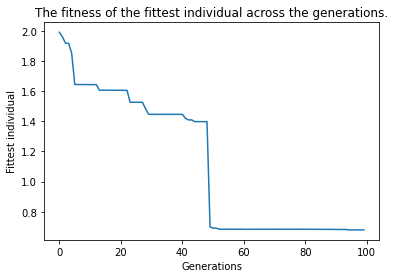

In [4]:
plt.plot(answer["maxlist"])
plt.title("The fitness of the fittest individual across the generations.")
plt.xlabel("Generations")
plt.ylabel("Fittest individual")
plt.show()

# C

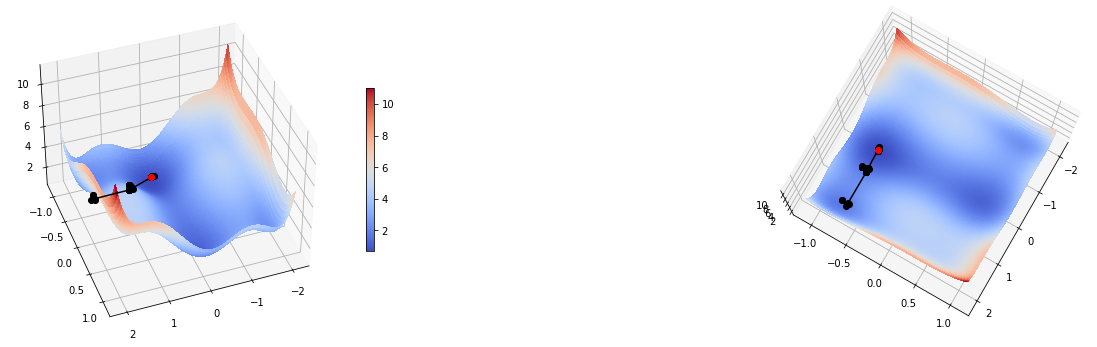

In [5]:
# answer = main()
def f(x1,x2):
    f= 2+(4.1*(x1**2))-(2.1*(x1**4))+(1/3*(x1**6))+(x1*x2)-(4*(x2-0.05)**2)+(4*x2**4)
#     print("F: ",f)
    return f

xrange = np.linspace(-2.1, 2.1, 100)
yrange = np.linspace(-1.1, 1.1, 100)
X,Y = np.meshgrid(xrange, yrange)
Z = f(X, Y)

zvals = answer["combined"][:,2].tolist()
x2vals = answer["combined"][:,1].tolist()
x1vals = answer["combined"][:,0].tolist()

fig = plt.figure(figsize=(26,6))

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.plot3D(x1vals, x2vals,zvals, color="k", marker='o', zorder=10)
ax.plot3D(x1vals[-1], x2vals[-1],zvals[-1], color="red", marker='o', zorder=10)
ax.view_init(40, 70)

cb = fig.colorbar(p, shrink=0.5)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.plot3D(x1vals, x2vals,zvals, color="k", marker='o', zorder=10)
ax.plot3D(x1vals[-1], x2vals[-1],zvals[-1], color="red", marker='o', zorder=10)
ax.view_init(80, 30)

# 1.2

In [6]:
def dx1(x1,x2):#calculates change
    return 8.2*x1-8.4*x1**3 + 2*x1**5 + x2

def dx2(x1,x2):
    return x1-8*x2+0.4+16*x2**3

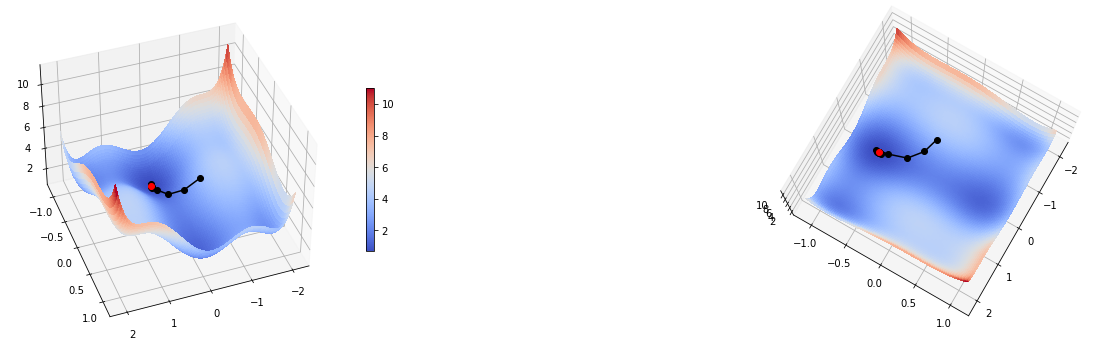

In [7]:
# x1=1
# x2=1
# import random
x1 = random.randint(-2,2)
x2 = random.randint(-1,1)

xlist=[]
ylist=[]
zlist=[]
alpha=0.1
for step in range (0,30):
    newx1=x1-alpha*(dx1(x1,x2))
    x2=x2-alpha*(dx2(x1,x2))
    x1=newx1
    z=f(x1,x2)
    xlist.append(x1)
    ylist.append(x2)
    zlist.append(z)
    
fig = plt.figure(figsize=(26,6))

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.plot3D(xlist, ylist,zlist, color="k", marker='o', zorder=10)
ax.plot3D(xlist[-1], ylist[-1],zlist[-1], color="red", marker='o', zorder=10)
ax.view_init(40,70)

cb = fig.colorbar(p, shrink=0.5)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.plot3D(xlist, ylist,zlist, color="k", marker='o', zorder=10)
ax.plot3D(xlist[-1], ylist[-1],zlist[-1], color="red", marker='o', zorder=10)
ax.view_init(80, 30)


# 2

# a and b

## canonical PSO

<ipython-input-8-b07ada1785d5>:58: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  f=(-np.sum(x*np.sin(np.sqrt(np.abs(x)))for x in individual))


gen	evals	avg     	std    	min     	max    
0  	50   	-178.601	833.151	-1742.37	1621.19
10 	50   	-195.386	878.579	-1879.43	1906.28
20 	50   	-261.364	899.133	-2084.67	2376.46
30 	50   	-343.246	862.337	-2286.17	2050.29
40 	50   	-388.671	788.85 	-2299.71	913.108
50 	50   	-403.774	819.116	-2299.79	1255.31
60 	50   	-375.792	865.701	-2438.84	1394.43
70 	50   	-399.506	843.213	-2440.22	1144.59
80 	50   	-425.252	764.132	-2440.22	884.006
90 	50   	-477.998	713.407	-2440.22	1099.13
100	50   	-550.815	690.863	-2440.22	784.817
110	50   	-628.302	721.481	-2440.22	722.614
120	50   	-697.137	736.312	-2440.22	770.265
130	50   	-650.369	737.884	-2440.22	832.852
140	50   	-603.419	716.507	-2440.22	800.827
150	50   	-609.228	726.088	-2440.22	724.544
160	50   	-607.392	746.784	-2440.22	713.012
170	50   	-544.059	765.113	-2440.22	790.781
180	50   	-519.478	736.179	-2440.22	693.355
190	50   	-536.528	741.865	-2440.22	884.095
200	50   	-554.25 	744.023	-2440.22	731.389
210	50   	-516.531	753.838	-2440

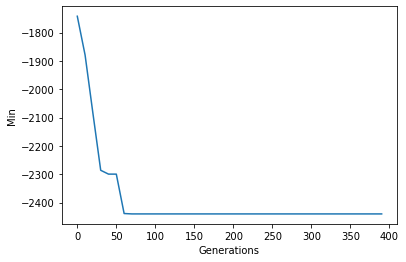

In [8]:
posMinInit      = -500
posMaxInit      = + 500
VMaxInit        = 1.5
VMinInit        = 0.5
populationSize  = 50
dimension       = 20
interval        = 10
iterations      = 400 
# num_neighbours  = 5

#Parameter setup

wmax = 0.9 #weighting
wmin = 0.4 
c1   = 2.0
c2   = 2.0

creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # -1 is for minimise
creator.create("Particle", list, fitness=creator.FitnessMin, speed=list, smin=None, smax=None, best=None)

def generate(size, smin, smax):
    part = creator.Particle(random.uniform(posMinInit, posMaxInit) for _ in range(size)) 
    part.speed = [random.uniform(VMinInit, VMaxInit) for _ in range(size)]
    part.smin = smin #speed clamping values
    part.smax = smax
    return part

def updateParticle(part, best, weight):
    #implementing speed = 0.7*(weight*speed + c1*r1*(localBestPos-currentPos) + c2*r2*(globalBestPos-currentPos))
    #Note that part and part.speed are both lists of size dimension
    #hence all multiplies need to apply across lists, so using e.g. map(operator.mul, ...

    r1 = (random.uniform(0, 1) for _ in range(len(part)))
    r2 = (random.uniform(0, 1) for _ in range(len(part)))

    v_r0 = [weight*x for x in part.speed]
    v_r1 = [c1*x for x in map(operator.mul, r1, map(operator.sub, part.best, part))] # local best
    v_r2 = [c2*x for x in map(operator.mul, r2, map(operator.sub, best, part))] # global best
    
    part.speed = [0.7*x for x in map(operator.add, v_r0, map(operator.add, v_r1, v_r2))]
    
    for j, speed in enumerate(part.speed):
        if abs(speed) < part.smin:
            part.speed[j] = math.copysign(part.smin, speed)
        elif abs(speed) > part.smax:
            part.speed[j] = math.copysign(part.smax, speed)
    
    # update position with speed
    part[:] = list(map(operator.add, part, part.speed))




    
    
def f2(individual):
    
    f=(-np.sum(x*np.sin(np.sqrt(np.abs(x)))for x in individual))
    return f

def eval_sphere2(particle):#this is our fitness function
    z = f2(particle)
    return (z,)

toolbox = base.Toolbox()
toolbox.register("particle", generate, size=dimension, smin=-3, smax=3)
toolbox.register("population", tools.initRepeat, list, toolbox.particle)
toolbox.register("update", updateParticle)
toolbox.register("evaluate", eval_sphere2) #sphere function is built-in in DEAP


def main2():
    pop = toolbox.population(n=populationSize) # Population Size
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    logbook = tools.Logbook()
    logbook.header = ["gen", "evals"] + stats.fields

    best = None

    #begin main loop
    for g in range(iterations):
        w = wmax - (wmax-wmin)*g/iterations #decaying inertia weight
        
        for part in pop:
            part.fitness.values = toolbox.evaluate(part) #actually only one fitness value
            
            #update local best
            if (not part.best) or (part.best.fitness < part.fitness):   #lower fitness is better (minimising)
            #   best is None   or  current value is better              #< is overloaded        
                part.best = creator.Particle(part)
                part.best.fitness.values = part.fitness.values
            
            #update global best
            if (not best) or best.fitness < part.fitness:
                best = creator.Particle(part)
                best.fitness.values = part.fitness.values
                
        for part in pop:
            toolbox.update(part, best,w)

        # Gather all the fitnesses in one list and print the stats
        # print every interval
        if g%interval==0: # interval
            logbook.record(gen=g, evals=len(pop), **stats.compile(pop))
            print(logbook.stream)
            #print('best ',best, best.fitness)
    
    print('best particle position is ',best)
    return pop, logbook, best

pop, logbook, best = main2()
print(best.fitness.values)

yvalues = []
xvalues=[]
for i in logbook:
    yvalues.append(i["min"])
    xvalues.append(i["gen"])

plt.plot(xvalues,yvalues)
plt.xlabel("Generations")
plt.ylabel("Min")
plt.show()

# C

## Social Learning-PSO

gen	evals	avg    	std    	min     	max    
0  	102  	83.1404	885.162	-1764.42	2009.03
1  	102  	12.7284	695.575	-1764.42	1507.87
2  	102  	-224.568	725.406	-2289.88	2332.67
3  	102  	12.247  	774.978	-2289.88	2401.57
4  	102  	29.7378 	1148.25	-2956.03	3720.63


/home/egichuki/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/egichuki/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Particle' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
<ipython-input-9-3a434174d9f3>:49: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  f=(-np.sum(x*np.sin(np.sqrt(np.abs(x)))for x in individual))


5  	102  	-20.8606	1102.04	-3131.56	5659.07
6  	102  	3.92986 	1353.64	-3195.39	4612.15
7  	102  	-211.682	1494.25	-4062.28	3676.45
8  	102  	-83.0162	1729.88	-5331.52	5228.94
9  	102  	-657.127	1957.49	-7377.74	4821.06
10 	102  	-510.13 	2251.93	-7377.74	5057.85
11 	102  	-17.3999	2646.47	-7377.74	8997.38
12 	102  	-217.541	2792.16	-7377.74	5097.95
13 	102  	-202.517	2825.74	-7377.74	7378.16
14 	102  	465.56  	3688.62	-7377.74	10472.7
15 	102  	-105.97 	3477.93	-9783.49	8653.39
16 	102  	-363.53 	4122.1 	-12651.6	9207.9 
17 	102  	-356.507	5026.77	-15062.9	11529.1
18 	102  	-302.401	5401.24	-21512.9	13762.8
19 	102  	-765.769	5889.79	-21512.9	11453.8
20 	102  	411.165 	6066.47	-21512.9	15800.6
21 	102  	-494.11 	6627.3 	-22073.1	19711.2
22 	102  	-1221.22	6961.05	-22073.1	20815.5
23 	102  	-684.577	8394.63	-35401.4	17104.4
24 	102  	145.361 	7817.59	-35401.4	18590.2
25 	102  	-354.258	7725.53	-35401.4	20271  
26 	102  	-716.406	9399.41	-35401.4	27799  
27 	102  	923.926 	8352.72	-3540

185	102  	-1.22136e+06	6.88147e+06	-2.17888e+07	1.5255e+07 
186	102  	-201356     	6.37216e+06	-2.17888e+07	1.48432e+07
187	102  	285643      	6.40691e+06	-2.17888e+07	1.6637e+07 
188	102  	-615805     	7.71742e+06	-2.52653e+07	1.54143e+07
189	102  	-444369     	7.00151e+06	-2.52653e+07	1.73201e+07
190	102  	-657189     	9.06339e+06	-2.52653e+07	1.97565e+07
191	102  	-67237.2    	8.42151e+06	-2.52653e+07	1.76379e+07
192	102  	-631690     	8.68148e+06	-2.52653e+07	1.80469e+07
193	102  	325771      	8.76151e+06	-2.52653e+07	1.81038e+07
194	102  	-1.24487e+06	9.87011e+06	-3.26798e+07	1.91325e+07
195	102  	1.68956e+06 	1.14248e+07	-3.26798e+07	2.77785e+07
196	102  	-979177     	1.01593e+07	-3.26798e+07	2.55953e+07
197	102  	945188      	1.08213e+07	-3.26798e+07	2.59998e+07
198	102  	-1.37185e+06	1.16366e+07	-3.26798e+07	3.34302e+07
199	102  	-1.2437e+06 	1.18297e+07	-4.14725e+07	2.7955e+07 
200	102  	-23636.7    	1.3025e+07 	-4.14725e+07	3.46664e+07
201	102  	246.19      	1.14792e+07	-4.14

331	102  	-1.89612e+07	1.6901e+08 	-5.92681e+08	4.30419e+08
332	102  	-2.50469e+07	1.68942e+08	-5.92681e+08	3.66249e+08
333	102  	1.19632e+07 	1.97445e+08	-5.92681e+08	5.05112e+08
334	102  	-1.59676e+07	1.77498e+08	-5.92681e+08	3.56296e+08
335	102  	-2.83041e+07	1.8157e+08 	-5.92681e+08	3.9302e+08 
336	102  	-2.73233e+07	2.13341e+08	-6.48249e+08	4.00633e+08
337	102  	3.01073e+07 	1.99874e+08	-6.48249e+08	4.53592e+08
338	102  	-2.64644e+07	2.30263e+08	-7.47568e+08	4.94672e+08
339	102  	-854673     	2.31575e+08	-7.47568e+08	4.90262e+08
340	102  	-8.66698e+06	2.28806e+08	-7.47568e+08	5.04642e+08
341	102  	6.5515e+06  	2.49016e+08	-7.47568e+08	8.19509e+08
342	102  	-4.12111e+07	2.56563e+08	-7.75725e+08	7.02106e+08
343	102  	-2.12997e+06	2.6502e+08 	-8.5825e+08 	7.69547e+08
344	102  	-1.21532e+07	2.71602e+08	-8.5825e+08 	5.937e+08  
345	102  	-2.41214e+07	2.99261e+08	-1.00511e+09	9.95612e+08
346	102  	-1.59207e+07	3.31659e+08	-1.00511e+09	6.40507e+08
347	102  	-1.99572e+07	3.26815e+08	-1.00

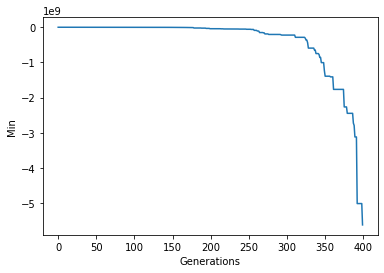

In [9]:
posMinInit      = -500
posMaxInit      = + 500
VMaxInit        = 1.5
VMinInit        = 0.5
dimension       = 20
interval        = 10
iterations      = 400#50*dimension
populationSize  = 100+int(dimension/10)
# print("tis",populationSize)
#variables used in SL-PSO
epsilon = dimension/100.0*0.01 # social influence of swarm centre

# function to get the mean positions of the inviduals (swarm centre)
def getcenter(pop):
    center=list()
    for j in range(dimension): # count through dimensions
        centerj = 0
        for i in pop: # for each particle
            centerj += i[j] # sum up position in dimention j
        centerj /= populationSize # Average
        center.append(centerj)
    return center

creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # -1 is for minimise
creator.create("Particle", list, fitness=creator.FitnessMin, speed=list, smin=None, smax=None, best=None)

def generate(size, smin, smax):
    part = creator.Particle(random.uniform(posMinInit, posMaxInit) for _ in range(size)) 
    part.speed = [random.uniform(VMinInit, VMaxInit) for _ in range(size)]
    part.smin = smin #speed clamping values
    part.smax = smax
    return part

def updateParticle(part,pop,center,i):
    r1 = random.uniform(0, 1)
    r2 = random.uniform(0, 1)
    r3 = random.uniform(0, 1)
    
    #Randomly choose a demonstrator for particle i from any of particles 0 to i-1, the Particle i 
    #updates its velocity by learning from the demonstrator and the mean position of the swarm
    demonstrator=random.choice(list(pop[0:i]))
    
    for j in range(dimension): # count through dimensions
        part.speed[j]=r1*part.speed[j]+r2*(demonstrator[j]-part[j])+r3*epsilon*(center[j]-part[j])
        part[j]=part[j]+part.speed[j]

op=[]
def f3(individual):
    f=(-np.sum(x*np.sin(np.sqrt(np.abs(x)))for x in individual))
    return f

def eval_sphere3(particle):#this is our fitness function
    z = f3(particle)
    return (np.sum(z),)

toolbox = base.Toolbox()
toolbox.register("particle", generate, size=dimension, smin=-3, smax=3)
toolbox.register("population", tools.initRepeat, list, toolbox.particle)
toolbox.register("update", updateParticle)
toolbox.register("evaluate", eval_sphere3) #sphere function is built-in in DEAP

def main3():
    pop = toolbox.population(n=populationSize) # Population Size
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    #intialize the learning probabilities
    prob=[0]*populationSize
    for i  in range(len(pop)):
        prob[populationSize - i - 1] = 1 - i/(populationSize - 1)
        prob[populationSize - i - 1] = pow(prob[populationSize - i - 1], math.log(math.sqrt(math.ceil(dimension/100.0))))

    logbook = tools.Logbook()
    logbook.header = ["gen", "evals"] + stats.fields

    #begin main loop
    for g in range(iterations):

        for part in pop:
            part.fitness.values = toolbox.evaluate(part) #actually only one fitness value

        #Sort the individuals in the swarm in ascending order. i.e., particle 0 is the best
        pop.sort(key=lambda x: x.fitness, reverse=True)
        #calculate the center (mean value) of the swarm
        center = getcenter(pop)
        
        for i  in reversed(range(len(pop)-1)):  # start with worst particle, and go in reverse towards best
                                                # don't do element 0 (best). Hence the i+1 below.
            if random.uniform(0, 1)<prob[i+1]: #learning probability for that particle
                toolbox.update(pop[i+1],pop,center,i+1)

        # Gather all the fitnesses in one list and print the stats
        # print every interval
#         if g%interval==0: # interval
        logbook.record(gen=g, evals=len(pop), **stats.compile(pop))
        print(logbook.stream)
    
    return pop, logbook
pop, logbook2 = main3()
yvalues = []
xvalues=[]
for i in logbook2:
    yvalues.append(i["min"])
    xvalues.append(i["gen"])

plt.plot(xvalues,yvalues)
plt.xlabel("Generations")
plt.ylabel("Min")
plt.show()

In [10]:
# import inspect
# print(inspect.getsource(benchmarks.schwefel))

# 3

# 3.1

In [11]:
import pandas as pd

In [12]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
table = []

def chrom2real(c):
    indasstring=''.join(map(str, c))
    degray=gray_to_bin(indasstring)
    numasint=int(degray, 2) # convert to int from base 2 list
    maxnum      = 2**10
    numinrange=-4+8*numasint/maxnum
#     print("numinrange: ", numinrange)
    return numinrange

# input: concatenated list of binary variables
# output: tuple of real numbers representing those variables
def separatevariables(v):
    return chrom2real(v[0:10]),chrom2real(v[10:20]),chrom2real(v[20:30])

def fctn1(x1,x2,x3):
    return (((x1-0.6)/1.6)**2+(x2/3.4)**2+(x3-1.3)**2)/2.0

def fctn2(x1,x2,x3):
    return ((x1/1.9-2.3)**2+(x2/3.3-7.1)**2+(x3+4.3)**2)/3.0



def fitnessFunction(individual):
    x1,x2,x3=separatevariables(individual)
    f1=fctn1(x1,x2,x3)
    f2=fctn2(x1,x2,x3)
    table.append([x1,x2,x3,f1,f2])
    return f1,f2    
    
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual,toolbox.attr_bool, 30)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitnessFunction)
toolbox.register("mate", tools.cxTwoPoint)
flipProb=1.0/9
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb)
toolbox.register("select", tools.selNSGA2)

def main(seed=None):
#     random.seed(seed)

    MU = 24

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean, axis=0)
    stats.register("std", numpy.std, axis=0)
    stats.register("min", numpy.min, axis=0)
    stats.register("max", numpy.max, axis=0)
    
    logbook = tools.Logbook()
    logbook.header = "gen", "evals", "std", "min", "avg", "max"
    
    pop = toolbox.population(n=MU)
    print("len of pop",len(pop))
    
    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in pop if not ind.fitness.valid]
    print("invalid fitnesses individuals",len(invalid_ind))
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    
    record = stats.compile(pop)
    logbook.record(gen=0, evals=len(invalid_ind), **record)

    return pop, logbook
    
pop, stats = main()
nwTable = pd.DataFrame(table, columns=["x1","x2","x3","f1","f2"])
nwTable

/home/egichuki/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


len of pop 24
invalid fitnesses individuals 24


,x1,x2,x3,f1,f2
0,0.445312,2.796875,-0.820312,2.590880,18.489438
1,1.343750,-3.875000,0.023438,1.572311,29.897365
2,-3.578125,-3.968750,0.562500,4.362741,36.692430
3,1.156250,3.140625,-0.210938,1.628522,19.127654
4,2.929688,3.593750,-2.164062,7.618521,13.756274
5,-2.445312,0.843750,3.304688,3.851492,39.180860
6,2.187500,-0.375000,-2.242188,6.771847,19.196872
7,-1.210938,0.796875,1.640625,0.726005,30.319433
8,-3.132812,-1.367188,1.468750,2.816549,35.112192
9,0.078125,-1.398438,-3.453125,11.433879,20.808947


# 3.2

In [13]:


#First function to optimize
def function1(x1,x2,x3):
    value = (((x1-0.6)/1.6)**2+(x2/3.4)**2+(x3-1.3)**2)/2.0
    return value

#Second function to optimize
def function2(x1,x2,x3):
    value = ((x1/1.9-2.3)**2+(x2/3.3-7.1)**2+(x3+4.3)**2)/3.0
    return value

#Function to find index of list
def index_of(a,list):
    for i in range(0,len(list)):
        if list[i] == a:
            return i
    return -1

#Function to sort by values
def sort_by_values(list1, values):
    sorted_list = []
    while(len(sorted_list)!=len(list1)):
        if index_of(min(values),values) in list1:
            sorted_list.append(index_of(min(values),values))
        values[index_of(min(values),values)] = math.inf
    return sorted_list


def efficient_non_dominated_sort(first, second):# efficient non dominated sort
    unsorted=first
    first.sort()
#     print(first)
    frontvalues=[[unsorted.index(first[0])]]
    for i in range(len(first)-1):
        my_val=first[i+1]
        idx=unsorted.index(my_val)
        check=0
        counter=0
        for z in frontvalues:
            for j in z:
#                 print(j)
                if second[idx]<second[j]:
                    check=1
                    m=idx
                
                else:
                    check=0
                    n=idx
                    counter+=1
                    break
#             print("z is: ",z)
        if check==1:
            frontvalues[counter].append(m)
        else:
            frontvalues.append([n])
#     print("these are: ",frontvalues)
    return frontvalues


#Function to calculate crowding distance
def crowding_distance(values1, values2, front):
    distance = [0 for i in range(0,len(front))]
    sorted1 = sort_by_values(front, values1[:])
    sorted2 = sort_by_values(front, values2[:])
    distance[0] = 4444444444444444
    distance[len(front) - 1] = 4444444444444444
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted1[k+1]] - values1[sorted1[k-1]])/(max(values1)-min(values1))
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values2[sorted2[k+1]] - values2[sorted2[k-1]])/(max(values2)-min(values2))
    return distance

#Function to carry out the crossover
def crossover(a,b):
    r=random.random()
    if r>0.5:
        return mutation((a+b)/2)
    else:
        return mutation((a-b)/2)

#Function to carry out the mutation operator
def mutation(solution):
    mutation_prob = random.random()
    if mutation_prob <1:
        solution = min_x+(max_x-min_x)*random.random()
    return solution

#Main program starts here
pop_size = 24
max_gen = 1

#Initialization
min_x=-4
max_x=4

x1=[min_x+(max_x-min_x)*random.random() for i in range(0,pop_size)]
x2=[min_x+(max_x-min_x)*random.random() for i in range(0,pop_size)]
x3=[min_x+(max_x-min_x)*random.random() for i in range(0,pop_size)]
print("x1 values",x1)
print("x2 values",x2)
print("x3 values",x3)
gen_no=0
while(gen_no<max_gen):
    function1_values = [function1(x1[i],x2[i],x3[i])for i in range(0,pop_size)]
    function2_values = [function2(x1[i],x2[i],x3[i])for i in range(0,pop_size)]
    non_dominated_sorted_solution = efficient_non_dominated_sort(function1_values[:],function2_values[:])

    
    crowding_distance_values=[]
    for i in range(0,len(non_dominated_sorted_solution)):
        crowding_distance_values.append(crowding_distance(function1_values[:],function2_values[:],non_dominated_sorted_solution[i][:]))
    
    
    gen_no = gen_no + 1

x1 values [-2.746755522819895, 0.4412051470379357, 2.5520253015654193, 3.902283330965397, 2.4327946643172647, 1.3133029958543272, 2.359711457784737, 3.7825865776820775, -2.9030814143773966, -3.6815229927453545, 0.9381073792340704, -0.4153358638650593, 0.36540192595244925, 1.3397038082318868, 0.7606277128027896, -3.7039616243192333, 2.9228580532287163, 2.6744376648162946, -1.1360278232960397, 2.957976205214539, -2.951106372652693, 0.6110024009030814, -3.0420094379527223, -1.3541107164491217]
x2 values [1.9267807764905767, -1.2995731652653078, 2.996266749117723, 2.8837505113826447, -3.1575403699014517, -1.0114916655059494, -0.785072773105643, -2.4010996983357185, 3.741750536328037, -0.593260445575627, -3.420277745771794, -2.5978146042337977, -3.881338242275377, 2.304928251822685, 3.5300050666828815, -1.6068714161688664, -2.8703594305043794, 3.6895265672498283, 1.8616651611645736, 2.188707595266611, 0.7997606430108899, 3.2756303117590884, 2.4925948974209398, -0.49138196463841055]
x3 value

In [14]:
function1,function2

(<function __main__.function1(x1, x2, x3)>,
 <function __main__.function2(x1, x2, x3)>)

In [15]:
color_array = len(non_dominated_sorted_solution)
color = ["#"+''.join([random.choice('ABCDEF0123456789') for j in range(6)]) for i in range(color_array)]
fronts_array = ["front_"+str(i) for i in range(color_array)]
print(color)
print(fronts_array)

['#50DDA0', '#E8D890', '#8C2E49', '#F4AFC0', '#AB669E', '#7C3BB2', '#57AF23']
['front_0', 'front_1', 'front_2', 'front_3', 'front_4', 'front_5', 'front_6']


In [16]:
# generate the legend
fin = []
for i in range(color_array):
    fin.append(mpatches.Patch(color=color[i], label="front_"+str(i)))

## scatter plot showing fronts

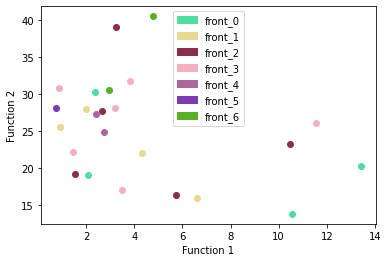

In [17]:
for index,j in enumerate(function1_values):
    for i in range(0,len(non_dominated_sorted_solution)):
        if index in non_dominated_sorted_solution[i]:
            plt.scatter(function1_values[index],function2_values[index],color=color[i])


plt.xlabel("Function 1")
plt.ylabel("Function 2")
plt.legend(handles=fin,loc='best')
plt.show()
# handles, labels

## F1,F2, Front number

In [18]:
myarr = []
for index,j in enumerate(function1_values):
    for i in range(0,len(non_dominated_sorted_solution)):
        if index in non_dominated_sorted_solution[i]:
            myarr.append([i,function1_values[index],function2_values[index]])

print("the worst values have been highlighted in yellow")
df = pd.DataFrame(myarr, columns=["Front","F1","F2"]).sort_values(by=['Front'])
df.style.applymap(lambda x : "background-color: yellow" if (x == max(df["F1"]) or x == max(df["F2"]) ) else False)

the worst values have been highlighted in yellow


,Front,F1,F2
0,0,2.383643,30.300527
1,0,13.400097,20.208315
2,0,2.081600,19.028138
3,0,10.552081,13.778572
4,1,1.997098,28.007930
5,1,0.911091,25.487878
8,1,4.302614,22.049056
13,1,6.623079,15.914336
19,2,5.717615,16.292079
14,2,1.541711,19.169231


# 3.3

In [19]:
non_dominated_sorted_solution

[[0, 1, 2, 3],
 [4, 5, 8, 13],
 [6, 7, 11, 14, 19],
 [9, 10, 12, 15, 17, 21],
 [16, 23],
 [18],
 [20, 22]]

In [20]:
f = 0
another_table = []
for m,n in zip(non_dominated_sorted_solution,crowding_distance_values):
    for y,z in zip(m,n):
        another_table.append([function1_values[y],function1_values[y],f,z])
    f+=1

pd.DataFrame(another_table, columns=["F1","F2", "Front","Crowding Distance"])

,F1,F2,Front,Crowding Distance
0,2.383643,2.383643,0,4.444444e+15
1,13.400097,13.400097,0,9.097822e-01
2,2.081600,2.081600,0,1.291946e+00
3,10.552081,10.552081,0,4.444444e+15
4,1.997098,1.997098,1,4.444444e+15
5,0.911091,0.911091,1,6.257342e-01
6,4.302614,4.302614,1,5.882857e-01
7,6.623079,6.623079,1,4.444444e+15
8,3.246155,3.246155,2,4.444444e+15
9,2.664914,2.664914,2,3.958603e-01


# 3.4

/home/egichuki/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/egichuki/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


3.4


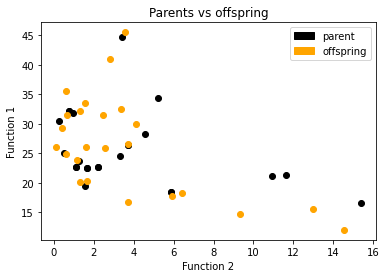

3.5


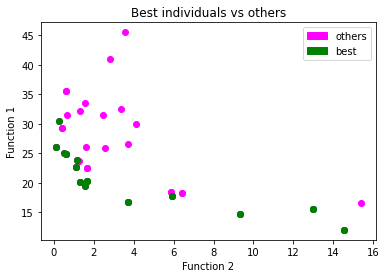

In [21]:


creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()


def chrom2real(c):
    indasstring=''.join(map(str, c))
    degray=gray_to_bin(indasstring)
    numasint=int(degray, 2) # convert to int from base 2 list
    maxnum      = 2**10
    numinrange=-4+8*numasint/maxnum
    return numinrange

# input: concatenated list of binary variables
# output: tuple of real numbers representing those variables
def separatevariables(v):
    return chrom2real(v[0:10]),chrom2real(v[10:20]),chrom2real(v[20:30])

def fctn1(x1,x2,x3):
    return (((x1-0.6)/1.6)**2+(x2/3.4)**2+(x3-1.3)**2)/2.0

def fctn2(x1,x2,x3):
    return ((x1/1.9-2.3)**2+(x2/3.3-7.1)**2+(x3+4.3)**2)/3.0


def calcFitness(individual):
    x1,x2,x3=separatevariables(individual)
    f1=fctn1(x1,x2,x3)
    f2=fctn2(x1,x2,x3)
    
    return f1,f2    

#Function to carry out the crossover
def crossover(a,b):
    r=random.random()
    if r>0.5:
        return mutation((a+b)/2)
    else:
        return mutation((a-b)/2)

#Function to carry out the mutation operator
def mutation(solution):
    mutation_prob = random.random()
    if mutation_prob <1:
        solution = min_x+(max_x-min_x)*random.random()
    return solution

    
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_bool, 30)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", calcFitness)
toolbox.register("mate", tools.cxUniform)
flipProb=1.0/30
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb)
toolbox.register("select", tools.selNSGA2)

def main(seed=None):
    random.seed(seed)

    NGEN = 1
    MU = 24
    CXPB = 0.9

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean, axis=0)
    stats.register("std", numpy.std, axis=0)
    stats.register("min", numpy.min, axis=0)
    stats.register("max", numpy.max, axis=0)
    
    logbook = tools.Logbook()
    logbook.header = "gen", "evals", "std", "min", "avg", "max"
    
    pop = toolbox.population(n=MU)
    pop = toolbox.select(pop, len(pop))
    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in pop if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # This is just to assign the crowding distance to the individuals
    # no actual selection is done
    
    pop = tools.selTournamentDCD(pop, len(pop))

    record = stats.compile(pop)
    
    logbook.record(gen=0, evals=len(invalid_ind), **record)

    # Begin the generational process
    offspring = tools.selTournamentDCD(pop, len(pop))
    # selTournamentDCD means Tournament selection based on dominance (D) 
    # followed by crowding distance (CD). This selection requires the 
    # individuals to have a crowding_dist attribute
    offspring = [toolbox.clone(ind) for ind in pop]

    for ind1, ind2 in zip(offspring[::2], offspring[1::2]):
    #make pairs of all (even,odd) in offspring
        if random.random() <= CXPB:
            toolbox.mate(ind1, ind2,0.5)

        toolbox.mutate(ind1)
        toolbox.mutate(ind2)
        del ind1.fitness.values, ind2.fitness.values

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    fin = []
    color = ["black","orange"]
    d = ["parent","offspring"]
    for i in range(2):
        fin.append(mpatches.Patch(color=color[i], label=d[i]))

    print("3.4")
    for a in pop:
        plt.scatter(a.fitness.values[0],a.fitness.values[1],color="black")

    for a in offspring:
        plt.scatter(a.fitness.values[0],a.fitness.values[1],color="orange")

    plt.xlabel("Function 2")
    plt.ylabel("Function 1")
    plt.title("Parents vs offspring")
    plt.legend(handles=fin)
    plt.show()






    fig1, ax1 = plt.subplots()
    # Select the next generation population
    pop = toolbox.select(pop + offspring, MU)
    best_individuals = toolbox.select(pop + offspring, MU)
    all_individuals=toolbox.select(pop + offspring, MU*2)

    # generate the legend
    fin = []
    color = ["magenta","green"]
    d = ["others","best"]
    for i in range(2):
        fin.append(mpatches.Patch(color=color[i], label=d[i]))
    #         plotting
    print("3.5")
    for p in all_individuals:
        ax1.scatter(p.fitness.values[0],p.fitness.values[1],color="magenta",label="others")
    for p in best_individuals:
        ax1.scatter(p.fitness.values[0],p.fitness.values[1],color="green",label="best")
    plt.xlabel("Function 2")
    plt.ylabel("Function 1")
    plt.title("Best individuals vs others")
    plt.legend(handles=fin)
    plt.show()



    record = stats.compile(pop)
    logbook.record(gen=1, evals=len(invalid_ind), **record)

    #print("Final population hypervolume is %f" % hypervolume(pop, [11.0, 11.0]))

    return pop, logbook
        
if __name__ == "__main__":
    pop, stats = main()

# 3.6

In [22]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()


def chrom2real(c):
    indasstring=''.join(map(str, c))
    degray=gray_to_bin(indasstring)
    numasint=int(degray, 2) # convert to int from base 2 list
    maxnum      = 2**10
    numinrange=-4+8*numasint/maxnum
    return numinrange

# input: concatenated list of binary variables
# output: tuple of real numbers representing those variables
def separatevariables(v):
    return chrom2real(v[0:10]),chrom2real(v[10:20]),chrom2real(v[20:30])


def calcFitness(individual):
    x1,x2,x3=separatevariables(individual)
    f1=(((x1-0.6)/1.6)**2+(x2/3.4)**2+(x3-1.3)**2)/2.0
    f2=((x1/1.9-2.3)**2+(x2/3.3-7.1)**2+(x3+4.3)**2)/3.0
    
    return f1,f2    

#Function to carry out the crossover
def crossover(a,b):
    r=random.random()
    if r>0.5:
        return mutation((a+b)/2)
    else:
        return mutation((a-b)/2)

#Function to carry out the mutation operator
def mutation(solution):
    mutation_prob = random.random()
    if mutation_prob <1:
        solution = min_x+(max_x-min_x)*random.random()
    return solution

   
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual,
    toolbox.attr_bool, 30)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", calcFitness)
toolbox.register("mate", tools.cxUniform)
flipProb=1.0/30
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb)
toolbox.register("select", tools.selNSGA2)

def main(seed=None):

    NGEN = 30
    MU = 24
    CXPB = 0.9

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean, axis=0)
    stats.register("std", numpy.std, axis=0)
    stats.register("min", numpy.min, axis=0)
    stats.register("max", numpy.max, axis=0)
   
    logbook = tools.Logbook()
    logbook.header = "gen", "evals", "std", "min", "avg", "max"
   
    pop = toolbox.population(n=MU)
    pop = toolbox.select(pop, len(pop))
    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in pop if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # This is just to assign the crowding distance to the individuals
    # no actual selection is done
    
    pop = tools.selTournamentDCD(pop, len(pop))
   
   
    record = stats.compile(pop)
    logbook.record(gen=0, evals=len(invalid_ind), **record)

    # Begin the generational process
    hypervals=[]
    for gen in range(0, NGEN):
        # Vary the population
        offspring = tools.selTournamentDCD(pop, len(pop))
        # selTournamentDCD means Tournament selection based on dominance (D)
        # followed by crowding distance (CD). This selection requires the
        # individuals to have a crowding_dist attribute
        offspring = [toolbox.clone(ind) for ind in offspring]
       
        for ind1, ind2 in zip(offspring[::2], offspring[1::2]):
        #make pairs of all (even,odd) in offspring
            if random.random() <= CXPB:
                toolbox.mate(ind1, ind2,0.5)
           
            toolbox.mutate(ind1)
            toolbox.mutate(ind2)
            del ind1.fitness.values, ind2.fitness.values
       
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
               
        record = stats.compile(pop)
        logbook.record(gen=gen, evals=len(invalid_ind), **record)

        hypervals.append(hypervolume(pop, [max(df['F1']),max(df['F2'])]))
              
    print("hypervolume: ",hypervals)

    return pop, logbook,hypervals
       
if __name__ == "__main__":
    pop, stats,hypervolumes = main()

hypervolume:  [279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337, 279.1944561100337]


In [23]:
max(df['F1']),max(df['F2'])

(13.400097386716284, 40.547561857151074)

In [24]:

creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()


def chrom2real(c):
    indasstring=''.join(map(str, c))
    degray=gray_to_bin(indasstring)
    numasint=int(degray, 2) # convert to int from base 2 list
    maxnum      = 2**10
    numinrange=-5+10*numasint/maxnum
    return numinrange

# input: concatenated list of binary variables
# output: tuple of real numbers representing those variables
def separatevariables(v):
    return chrom2real(v[0:10]),chrom2real(v[10:20]),chrom2real(v[20:30])
def calcFitness(individual):
    x1,x2,x3=separatevariables(individual)
    f1=(((x1-0.6)/1.6)**2+(x2/3.4)**2+(x3-1.3)**2)/2.0
    f2=((x1/1.9-2.3)**2+(x2/3.3-7.1)**2+(x3+4.3)**2)/3.0
    return f1,f2    

#Function to carry out the crossover
def crossover(a,b):
    r=random.random()
    if r>0.5:
        return mutation((a+b)/2)
    else:
        return mutation((a-b)/2)

#Function to carry out the mutation operator
def mutation(solution):
    mutation_prob = random.random()
    if mutation_prob <1:
        solution = min_x+(max_x-min_x)*random.random()
    return solution

   
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual,
    toolbox.attr_bool, 30)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", calcFitness)
toolbox.register("mate", tools.cxUniform)
flipProb=1.0/30
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb)
toolbox.register("select", tools.selNSGA2)

def main(seed=None):
    h_vals=[]
    random.seed(seed)

    NGEN = 30
    MU = 24
    CXPB = 0.9

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean, axis=0)
    stats.register("std", numpy.std, axis=0)
    stats.register("min", numpy.min, axis=0)
    stats.register("max", numpy.max, axis=0)
   
    logbook = tools.Logbook()
    logbook.header = "gen", "evals", "std", "min", "avg", "max"
   
    pop = toolbox.population(n=MU)
    pop = toolbox.select(pop, len(pop))
    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in pop if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # This is just to assign the crowding distance to the individuals
    # no actual selection is done
    
    pop = tools.selTournamentDCD(pop, len(pop))
   
   
    record = stats.compile(pop)
    logbook.record(gen=0, evals=len(invalid_ind), **record)

    # Begin the generational process
    
    for gen in range(0, NGEN):
        # Vary the population
        offspring = tools.selTournamentDCD(pop, len(pop))
        # selTournamentDCD means Tournament selection based on dominance (D)
        # followed by crowding distance (CD). This selection requires the
        # individuals to have a crowding_dist attribute
        offspring = [toolbox.clone(ind) for ind in offspring]
       
        for ind1, ind2 in zip(offspring[::2], offspring[1::2]):
        #make pairs of all (even,odd) in offspring
            if random.random() <= CXPB:
                toolbox.mate(ind1, ind2,0.5)
           
            toolbox.mutate(ind1)
            toolbox.mutate(ind2)
            del ind1.fitness.values, ind2.fitness.values
       
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
       

        # Select the next generation population
        pop = toolbox.select(pop + offspring, MU)
        best = toolbox.select(pop + offspring, MU)
        all_individuals=toolbox.select(pop + offspring, MU*2)

        
   

               
        record = stats.compile(pop)
        logbook.record(gen=gen, evals=len(invalid_ind), **record)
        h_vals.append(hypervolume(pop, [max(df['F1']),max(df['F2'])]))
       
       
    return h_vals,pop
       
if __name__ == "__main__":
    h_vals,pop = main()


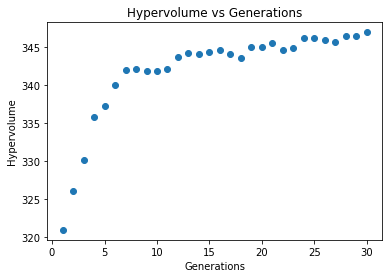

In [25]:
plt.scatter([i+1 for i in range(30)],h_vals)
plt.xlabel("Generations")
plt.ylabel("Hypervolume")
plt.title("Hypervolume vs Generations")
plt.show()

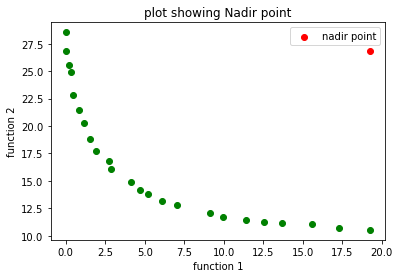

In [26]:
f1f2 = numpy.array([ind.fitness.values for ind in pop])
f1f2
maxf1 = 0
maxf2 = 0
for i in f1f2:
    plt.scatter(i[0],i[1],color= "green")
    if i[0] > maxf1:
        maxf1 = i[0]
    elif i[1] > maxf2:
        maxf2 = i[1]
    
plt.scatter(maxf1,maxf2, color="red",label="nadir point")
plt.title("plot showing Nadir point")
plt.legend()
plt.xlabel("function 1")
plt.ylabel("function 2")
plt.show()